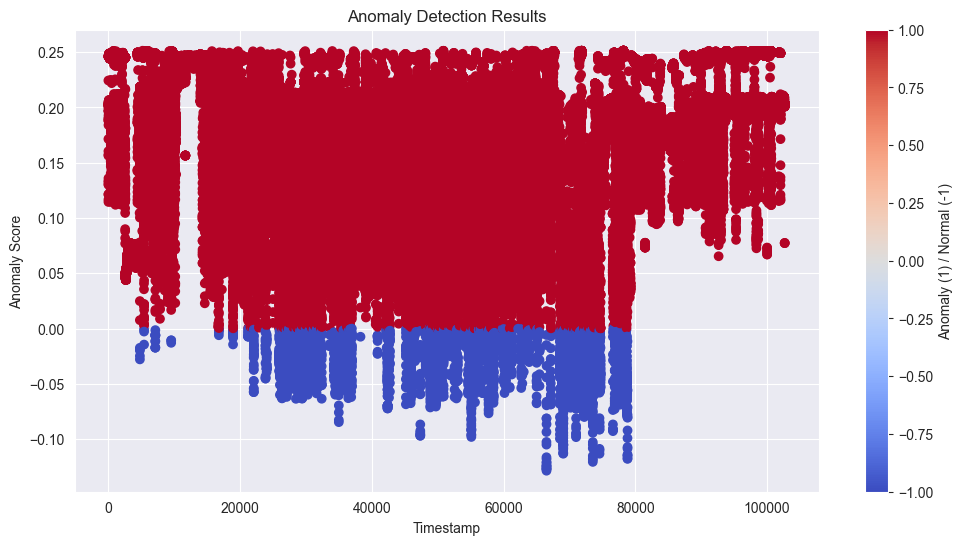

Identified Anomalies:
            DateTime  Filter#1_CTRL_FRC  Filter#1_CTRL_PRC  \
66506    2/8/23 0:34           762.9139           22.95002   
66507    2/8/23 0:35           800.0000           23.89684   
66508    2/8/23 0:39           793.9715           25.99335   
66509    2/8/23 0:59           754.6888           39.65449   
66510    2/8/23 1:07           739.5851           44.90704   
66511    2/8/23 1:10           733.5242           44.29660   
66512    2/8/23 1:10           732.1305           44.15624   
66513    2/8/23 1:11           730.4775           43.98975   
66514    2/8/23 1:14           724.3842           43.37605   
66515    2/8/23 1:17           718.3232           42.76561   
66516    2/8/23 1:25           703.1871           41.24115   
66517    2/8/23 1:28           698.7144           40.79067   
66518    2/8/23 1:33           687.9213           39.70363   
66519    2/8/23 1:39           676.0588           38.50887   
69047   2/13/23 6:01           789.5839         

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load your dataset (replace 'data.csv' with your data file)
df = pd.read_csv('/Users/saikiranpennam/Documents/RA/Western_Sugar_AI_Assessment_Working/2023/Data/Book1.csv')

# Select the three features of interest
selected_features = ['Filter#1_Inlet_Flow', 'Filter#1_Inlet_Pressure', 'Filter#1_Turbidity']
data = df[selected_features]

# Data Preprocessing
# Handle missing values if needed (e.g., fill with median or mean)
data = data.fillna(data.median())

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Choose the anomaly detection model (Isolation Forest)
model = IsolationForest(contamination=0.05, random_state=0)  # Adjust the contamination parameter as needed

# Train the model
model.fit(data_normalized)

# Detect anomalies
anomaly_scores = model.decision_function(data_normalized)
is_anomaly = model.predict(data_normalized)

# Visualize the anomalies
plt.figure(figsize=(12, 6))
plt.scatter(df.index, anomaly_scores, c=is_anomaly, cmap='coolwarm')
plt.title('Anomaly Detection Results')
plt.xlabel('Timestamp')
plt.ylabel('Anomaly Score')
plt.colorbar(label='Anomaly (1) / Normal (-1)')
plt.show()

# Threshold selection (you can adjust the threshold)
threshold = -0.1  # Adjust the threshold as needed

# Identify anomalies based on the threshold
anomalies = df[anomaly_scores < threshold]

# Display or save the identified anomalies
print("Identified Anomalies:")
print(anomalies)
anomalies.to_csv('anomalies.csv')  # Save anomalies to a CSV file if needed